In [ ]:
#Restaurant Review Sentiment Tool – Classify customer reviews

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the Dataset
df = pd.read_csv("Restaurant reviews.csv")
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [5]:
#Data Inspection and Cleaning
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d)').astype(float)
print(df['Rating'])

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
9995    3.0
9996    4.0
9997    1.0
9998    4.0
9999    3.0
Name: Rating, Length: 10000, dtype: float64


In [7]:
#Rating Processing
def make_label(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"
df['Sentiment'] = df['Rating'].apply(make_label)
print(df['Sentiment'])

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
9995     Neutral
9996    Positive
9997    Negative
9998    Positive
9999     Neutral
Name: Sentiment, Length: 10000, dtype: object


In [9]:
#Sentiment Label Creation
df[['Rating','Sentiment']].head()
df['Sentiment'].value_counts()

Sentiment
Positive    6274
Negative    2486
Neutral     1240
Name: count, dtype: int64

In [31]:
#Download NLP Resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_review(text):
    if pd.isna(text):        
        return ""
    text = str(text).lower() 
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)
print(df[['Review', 'Cleaned_Review']].head())

                                              Review  \
0  The ambience was good, food was quite good . h...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                      Cleaned_Review  
0  ambience good food quite good saturday lunch c...  
1  ambience good pleasant evening service prompt ...  
2  must try great food great ambience thnx servic...  
3  soumen da arun great guy behavior sincerety go...  
4  food goodwe ordered kodi drumstick basket mutt...  


In [21]:
#Text Preprocessing Function Definition
df['Review'] = df['Review'].fillna('')
df['Review'] = df['Review'].astype(str)
df['Cleaned_Review'] = df['Review'].apply(clean_review)
df[['Review','Cleaned_Review']].head()

,Review,Cleaned_Review
0,"The ambience was good, food was quite good . h...",ambience good food quite good saturday lunch c...
1,Ambience is too good for a pleasant evening. S...,ambience good pleasant evening service prompt ...
2,A must try.. great food great ambience. Thnx f...,must try great food great ambience thnx servic...
3,Soumen das and Arun was a great guy. Only beca...,soumen da arun great guy behavior sincerety go...
4,Food is good.we ordered Kodi drumsticks and ba...,food goodwe ordered kodi drumstick basket mutt...


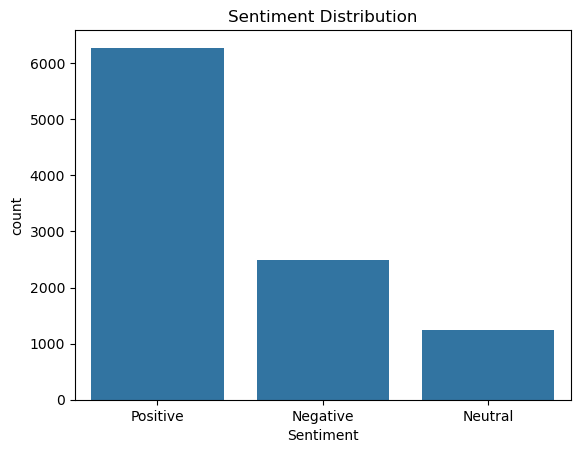

In [22]:
#Apply Text Preprocessing
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [23]:
#Exploratory Data Analysis (EDA)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment']
print("Number of features:", len(vectorizer.get_feature_names_out()))
print("First 20 features:", vectorizer.get_feature_names_out()[:20])

Number of features: 5000
First 20 features: ['aaloo' 'ab' 'able' 'abruptly' 'absolute' 'absolutely' 'abt' 'ac'
 'accept' 'acceptable' 'accepted' 'accepting' 'access' 'accessible'
 'accommodate' 'accommodating' 'accompanied' 'accompaniment' 'accompany'
 'accompanying']


In [29]:
#Feature Extraction using TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 5000)
X_test shape: (2000, 5000)
y_train shape: (8000,)
y_test shape: (2000,)


In [33]:
#Train-Test Split
nb = MultinomialNB()
nb.fit(X_train, y_train)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
#Model Training
nb_pred = nb.predict(X_test)
lr_pred = lr.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Naive Bayes Accuracy: 0.796
Logistic Regression Accuracy: 0.826


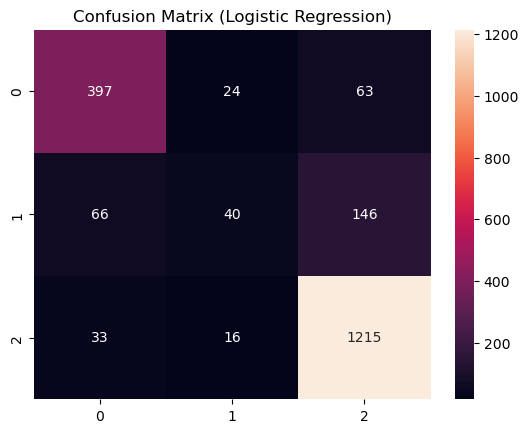

In [38]:
#Model Evaluation and Performance Analysis
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()